In [32]:
import pandas as pd
import numpy as np
import sklearn
import zipfile
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from pandas.core.common import SettingWithCopyWarning
from sklearn.feature_selection import chi2, SelectKBest

In [26]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
# Unzip file
with zipfile.ZipFile('craigslist-carstrucks-data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

Steps:
- Subsample data 
- Assemble dataset consisting of features and target 
- Identify relevant features for the prediction task
- Features leak target information?
- Show visualizations or statistics to support your selection
- Not required to use the description column, but can try to come up with relevatn features from it

In [12]:
df = pd.read_csv('data/vehicles.csv')

In [13]:
price = df.price
X = df.drop(columns='price')

Drop repetitive data such as the region_url, which contains the same information as 'region'.
Also drop 'url' which contains the same information as 'region', 'make', and 'model'.
Drop 'image_url' as all are images.craiglist. Drop 'id' and 'vin' as these are unique for every single data sample and therefore, not important for predicting price. Also drop description as this may include the price, thereby leaking the target, while providing uncessary information. Drop 'county' as the entire column in NaN and therefore, adds 0 value in predicting the price.

In [14]:
print('Number of unique id values: ', len(X['id']))
print('Number of unique url values: ', len)
print('Number of unqiue image url values: ')
print('Region Url Values: ')
print('Number of unique descriptions: ')

Number of unique id values:  509577


In [15]:
columns_to_drop = ['url', 'image_url', 'region_url', 'id', 'description', 'vin', 'county']
X = X.drop(columns=columns_to_drop)

In [16]:
X

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,salt lake city,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black,ut,40.7372,-111.858
1,salt lake city,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN,NaN,ut,40.5881,-111.884
2,salt lake city,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,4wd,NaN,NaN,white,ut,40.5881,-111.884
3,salt lake city,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN,NaN,ut,40.5881,-111.884
4,salt lake city,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,4wd,NaN,pickup,white,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,salt lake city,2012.0,nissan,xterra,NaN,6 cylinders,gas,103135.0,clean,automatic,4wd,NaN,SUV,NaN,ut,39.6405,-104.961
509573,salt lake city,2008.0,bmw,3 series 328i,NaN,6 cylinders,gas,108277.0,clean,automatic,rwd,NaN,convertible,NaN,ut,39.6405,-104.961
509574,salt lake city,2019.0,jeep,cherokee,NaN,4 cylinders,gas,6973.0,clean,automatic,4wd,NaN,SUV,white,ut,45.1637,-113.894
509575,salt lake city,2017.0,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,37520.0,clean,automatic,NaN,NaN,NaN,red,ut,41.3112,-111.969


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, price, shuffle=True, random_state=0)

In [18]:
data_obj = [col for col in X_train.columns if X_train[col].dtype == 'object']
data_float = [col for col in X_train.columns if X_train[col].dtype != 'object']
cols_nan = X_train.columns[X_train.isna().any()].tolist()
data_obj_missing = [col for col in data_obj if col in cols_nan]
data_float_missing = [col for col in data_float if col in cols_nan]

In [19]:
impute_categorical = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
impute_float = SimpleImputer(strategy='median',missing_values=np.nan)

In [20]:
X_train

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
323913,missoula,2012.0,ford,f350 super duty,excellent,NaN,diesel,88600.0,lien,automatic,4wd,full-size,truck,white,mt,46.5825,-113.2090
123671,stockton,2007.0,mercedes-benz,benz gl-450,excellent,NaN,gas,159000.0,clean,automatic,4wd,full-size,SUV,black,ca,38.6093,-121.4440
157650,ft myers / SW florida,2008.0,ram,NaN,NaN,NaN,diesel,NaN,clean,manual,NaN,NaN,NaN,NaN,fl,26.5677,-81.5954
156849,daytona beach,2004.0,bmw,530i,good,6 cylinders,gas,194000.0,clean,automatic,rwd,NaN,NaN,blue,fl,29.2833,-81.0882
4749,danville,1997.0,ford,f150 4x4,like new,8 cylinders,gas,185467.0,clean,automatic,4wd,full-size,truck,red,va,36.6218,-79.4124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439107,lancaster,2007.0,chevrolet,tahoe,excellent,8 cylinders,gas,128000.0,clean,automatic,4wd,full-size,SUV,blue,pa,40.1134,-76.5185
117952,san luis obispo,2006.0,chevrolet,corvette,excellent,NaN,gas,89152.0,clean,automatic,rwd,NaN,NaN,NaN,ca,35.1222,-120.6260
435829,erie,2008.0,chevrolet,colorado,NaN,NaN,gas,132811.0,clean,automatic,fwd,NaN,pickup,black,pa,41.5700,-81.5747
305711,st cloud,2006.0,chrysler,300 touring,fair,6 cylinders,gas,NaN,clean,automatic,rwd,full-size,sedan,silver,mn,45.7281,-94.9682


In [28]:
X_train[data_obj_missing] = impute_categorical.fit_transform(X_train[data_obj_missing])

In [27]:
X_train[data_float_missing] = impute_float.fit_transform(X_train[data_float_missing])

In [ ]:
# Should this be imputed? Maybe down the road...
X.loc[X['odometer'] == 0]

In [29]:
# For numeric data, do correlation
for col in data_float:
    print(X[col].corr(price))

-0.004212468335534853
-0.0005849066630465988
-0.0006014966856460122
0.0010188816680291402


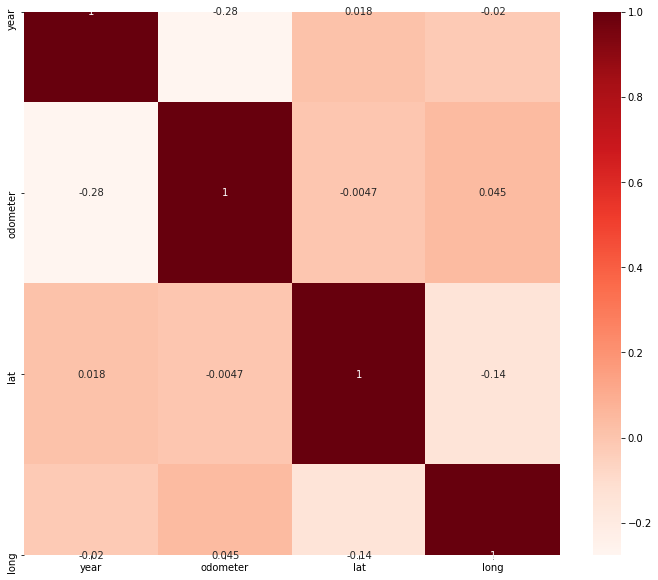

In [30]:
# Between variables coefficient (maybe we can move this down)
# Can say that highly correlated data can eventually be removed
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [56]:
# Ordinal Encoding
ordinal_encoder = preprocessing.OrdinalEncoder()
ordinal_encoder.fit(X_train[data_obj])
X_train_ordinal = ordinal_encoder.transform(X_train[data_obj])

In [57]:
ordinal_encoder.categories_

[array(['SF bay area', 'abilene', 'akron / canton', 'albany',
        'albuquerque', 'altoona-johnstown', 'amarillo', 'ames',
        'anchorage / mat-su', 'ann arbor', 'annapolis',
        'appleton-oshkosh-FDL', 'asheville', 'ashtabula', 'athens',
        'atlanta', 'auburn', 'augusta', 'austin', 'bakersfield',
        'baltimore', 'baton rouge', 'battle creek',
        'beaumont / port arthur', 'bellingham', 'bemidji', 'bend',
        'billings', 'binghamton', 'birmingham', 'bismarck', 'bloomington',
        'bloomington-normal', 'boise', 'boone', 'boston', 'boulder',
        'bowling green', 'bozeman', 'brainerd', 'brownsville', 'brunswick',
        'buffalo', 'butte', 'cape cod / islands', 'catskills',
        'cedar rapids', 'central NJ', 'central louisiana',
        'central michigan', 'champaign urbana', 'charleston', 'charlotte',
        'charlottesville', 'chattanooga', 'chautauqua', 'chicago', 'chico',
        'chillicothe', 'cincinnati', 'clarksville', 'cleveland',
        

In [67]:
X_train_ordinal = pd.DataFrame(X_train_ordinal)

In [74]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_ordinal[0:100000], y_train[0:100000])
fs.scores_

array([7.00986701e+05, 7.07873043e+04, 4.14766147e+07, 2.86327376e+04,
       3.09717137e+03, 4.90433451e+03, 2.47488649e+04, 2.15473154e+04,
       1.23372549e+04, 1.42729398e+03, 2.41927733e+04, 2.44491295e+04,
       1.15647273e+05])